In [1]:
from src.utils import (
    load_complex_array_from_binary,
    elastic_load_signal_trends_path,
    dynamic_load_signal_trends_path,
)

elastic_load_signal_trends = load_complex_array_from_binary(
    name="0", path=elastic_load_signal_trends_path
).real

C_1_0, C_1_1, S_1_1 = (
    elastic_load_signal_trends[0, 1, 0],
    elastic_load_signal_trends[0, 1, 1],
    elastic_load_signal_trends[1, 1, 1],
)

computed_elastic_load_signal_trends = load_complex_array_from_binary(
    name="0", path=dynamic_load_signal_trends_path
).real

computed_C_1_0, computed_C_1_1, computed_S_1_1 = (
    computed_elastic_load_signal_trends[0, 1, 0],
    computed_elastic_load_signal_trends[0, 1, 1],
    computed_elastic_load_signal_trends[1, 1, 1],
)

print("initial:", C_1_0, C_1_1, S_1_1)
print("dynamic:", computed_C_1_0, computed_C_1_1, computed_S_1_1)


initial: -1.3969529512767465 -0.2951341271296203 -0.00918608157732065
dynamic: -1.9869442189170463 -0.4561880496059686 0.07115016485993125


initial: -1.3969529512767465 -0.2951341271296203 -0.00918608157732065
dynamic: -2.2305960175559063 -0.5088329308337172 0.08639303607140274


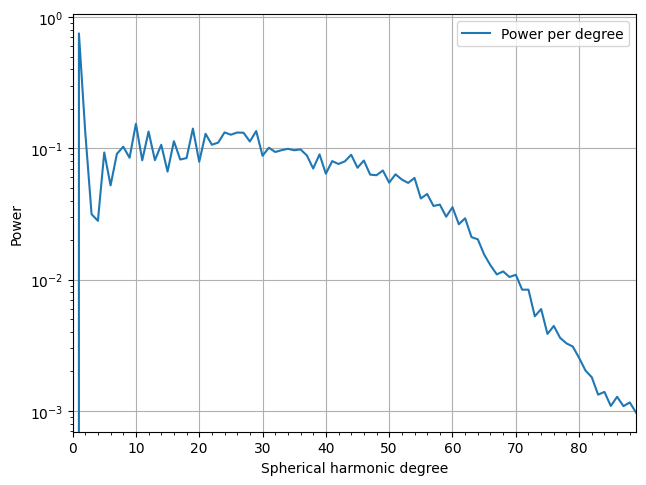

In [2]:
from src.utils import (
    load_complex_array_from_binary,
    elastic_load_signal_trends_path,
    dynamic_load_signal_trends_path,
)
from pyshtools import SHCoeffs

elastic_load_signal_trends = load_complex_array_from_binary(
    name="0", path=elastic_load_signal_trends_path
).real

C_1_0, C_1_1, S_1_1 = (
    elastic_load_signal_trends[0, 1, 0],
    elastic_load_signal_trends[0, 1, 1],
    elastic_load_signal_trends[1, 1, 1],
)

computed_elastic_load_signal_trends = load_complex_array_from_binary(
    name="2", path=dynamic_load_signal_trends_path
).real

computed_C_1_0, computed_C_1_1, computed_S_1_1 = (
    computed_elastic_load_signal_trends[0, 1, 0],
    computed_elastic_load_signal_trends[0, 1, 1],
    computed_elastic_load_signal_trends[1, 1, 1],
)

print("initial:", C_1_0, C_1_1, S_1_1)
print("dynamic:", computed_C_1_0, computed_C_1_1, computed_S_1_1)

clm = SHCoeffs.from_array(
    coeffs=computed_elastic_load_signal_trends - elastic_load_signal_trends
)
fig, ax = clm.plot_spectrum(show=False)

In [5]:
from src.utils import (
    compute_signal_trends,
    get_ocean_mask,
    redefine_n_max,
    build_frequencial_harmonic_elastic_load_signal,
)
from src.utils.classes import load_load_signal_hyper_parameters
from src.functions import mean_on_mask

load_signal_hyper_parameters = load_load_signal_hyper_parameters()
(
    dates,
    frequencies,
    frequencial_harmonic_elastic_load_signal,
) = build_frequencial_harmonic_elastic_load_signal(
    load_signal_hyper_parameters=load_signal_hyper_parameters
)

ocean_mask = get_ocean_mask(
    name=load_signal_hyper_parameters.ocean_mask,
    n_max=redefine_n_max(
        n_max=load_signal_hyper_parameters.n_max,
        harmonics=frequencial_harmonic_elastic_load_signal,
    ),
)

frequencial_harmonic_elastic_load_signal[:, :2 ,:, :] = 0.0

mean_on_mask(
    mask=ocean_mask,
    harmonics=compute_signal_trends(
        signal_dates=dates,
        load_signal_hyper_parameters=load_signal_hyper_parameters,
        frequencial_harmonic_load_signal=frequencial_harmonic_elastic_load_signal,
    ),
)

1.41086